In [2]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('all')




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

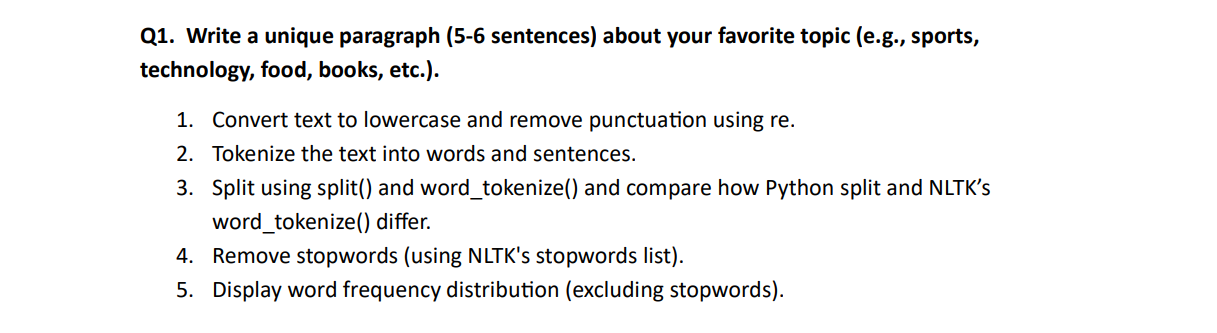

In [3]:
text = """Books have always fascinated me with their ability to transport readers into different worlds.
They offer knowledge, inspiration, and entertainment in ways nothing else can. From thrilling mysteries
to deep philosophical thoughts, books feed the mind and soul. I enjoy collecting rare editions and reading
classics on quiet weekends. Books are timeless companions for curious minds."""

# Convert to lowercase and remove punctuation
cleaned_text = re.sub(r'[^\w\s]', '', text.lower())

# Tokenize sentences and words
sentences = sent_tokenize(text)
words_nltk = word_tokenize(cleaned_text)

# Compare split() vs word_tokenize()
words_split = cleaned_text.split()
print("Split():", words_split)
print("word_tokenize():", words_nltk)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]

# Word frequency distribution
freq_dist = Counter(filtered_words)
print("\nWord Frequency (excluding stopwords):")
for word, freq in freq_dist.items():
    print(f"{word}: {freq}")


Split(): ['books', 'have', 'always', 'fascinated', 'me', 'with', 'their', 'ability', 'to', 'transport', 'readers', 'into', 'different', 'worlds', 'they', 'offer', 'knowledge', 'inspiration', 'and', 'entertainment', 'in', 'ways', 'nothing', 'else', 'can', 'from', 'thrilling', 'mysteries', 'to', 'deep', 'philosophical', 'thoughts', 'books', 'feed', 'the', 'mind', 'and', 'soul', 'i', 'enjoy', 'collecting', 'rare', 'editions', 'and', 'reading', 'classics', 'on', 'quiet', 'weekends', 'books', 'are', 'timeless', 'companions', 'for', 'curious', 'minds']
word_tokenize(): ['books', 'have', 'always', 'fascinated', 'me', 'with', 'their', 'ability', 'to', 'transport', 'readers', 'into', 'different', 'worlds', 'they', 'offer', 'knowledge', 'inspiration', 'and', 'entertainment', 'in', 'ways', 'nothing', 'else', 'can', 'from', 'thrilling', 'mysteries', 'to', 'deep', 'philosophical', 'thoughts', 'books', 'feed', 'the', 'mind', 'and', 'soul', 'i', 'enjoy', 'collecting', 'rare', 'editions', 'and', 'read

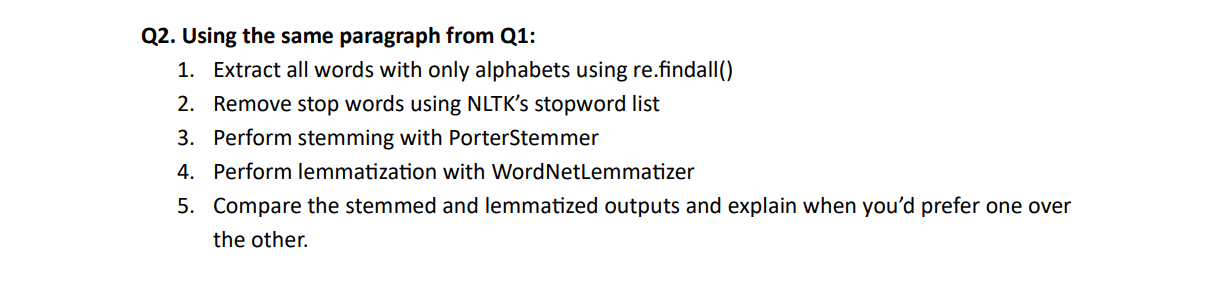

In [4]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer


# 1. Extract all words with only alphabets
words_alpha = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# 2. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_alpha if word not in stop_words]

# 3. Stemming
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in filtered_words]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

# 5. Comparison
print("Stemmed Words:\n", stemmed)
print("\nLemmatized Words:\n", lemmatized)

Stemmed Words:
 ['book', 'alway', 'fascin', 'abil', 'transport', 'reader', 'differ', 'world', 'offer', 'knowledg', 'inspir', 'entertain', 'way', 'noth', 'els', 'thrill', 'mysteri', 'deep', 'philosoph', 'thought', 'book', 'feed', 'mind', 'soul', 'enjoy', 'collect', 'rare', 'edit', 'read', 'classic', 'quiet', 'weekend', 'book', 'timeless', 'companion', 'curiou', 'mind']

Lemmatized Words:
 ['book', 'always', 'fascinated', 'ability', 'transport', 'reader', 'different', 'world', 'offer', 'knowledge', 'inspiration', 'entertainment', 'way', 'nothing', 'else', 'thrilling', 'mystery', 'deep', 'philosophical', 'thought', 'book', 'feed', 'mind', 'soul', 'enjoy', 'collecting', 'rare', 'edition', 'reading', 'classic', 'quiet', 'weekend', 'book', 'timeless', 'companion', 'curious', 'mind']


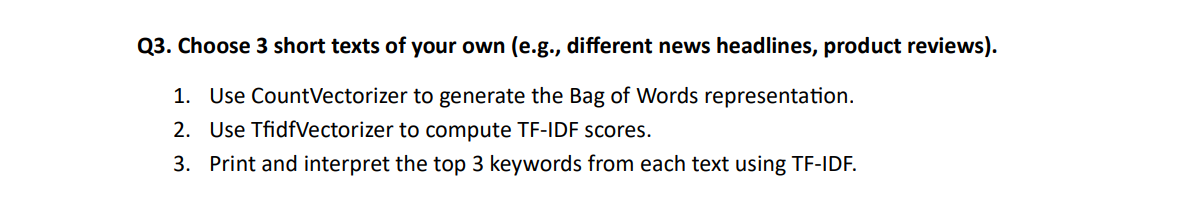

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

# 3 sample texts (short headlines/reviews)
texts = [
    "Apple releases new iPhone with groundbreaking camera features",
    "Customers love the fast delivery and excellent packaging of Amazon orders",
    "Tesla unveils cheaper electric car to expand market reach"
]

# 1. Bag of Words
count_vec = CountVectorizer()
bow_matrix = count_vec.fit_transform(texts)
print("Bag of Words:\n", bow_matrix.toarray())
print("Vocabulary:\n", count_vec.get_feature_names_out())

# 2. TF-IDF
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(texts)
feature_names = tfidf_vec.get_feature_names_out()

# 3. Top 3 keywords per document using TF-IDF
for i, row in enumerate(tfidf_matrix.toarray()):
    top_indices = row.argsort()[::-1][:3]
    top_words = [(feature_names[idx], row[idx]) for idx in top_indices]
    print(f"\nTop 3 keywords for Text {i+1}:")
    for word, score in top_words:
        print(f"{word}: {score:.4f}")


Bag of Words:
 [[0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0]]
Vocabulary:
 ['amazon' 'and' 'apple' 'camera' 'car' 'cheaper' 'customers' 'delivery'
 'electric' 'excellent' 'expand' 'fast' 'features' 'groundbreaking'
 'iphone' 'love' 'market' 'new' 'of' 'orders' 'packaging' 'reach'
 'releases' 'tesla' 'the' 'to' 'unveils' 'with']

Top 3 keywords for Text 1:
with: 0.3536
releases: 0.3536
new: 0.3536

Top 3 keywords for Text 2:
the: 0.3015
of: 0.3015
orders: 0.3015

Top 3 keywords for Text 3:
unveils: 0.3333
to: 0.3333
reach: 0.3333


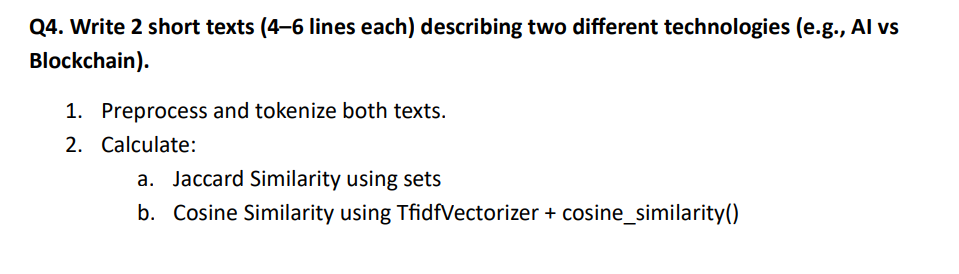

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Two sample texts: AI vs Blockchain
text1 = """Artificial Intelligence is a technology that enables machines to simulate human intelligence.
It is widely used in automation, natural language processing, and data-driven decision making."""

text2 = """Blockchain is a decentralized ledger technology that ensures secure and transparent transactions.
It is commonly applied in cryptocurrencies, supply chains, and digital identity verification."""

# Preprocess and tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

# a. Jaccard Similarity
set1, set2 = set(tokens1), set(tokens2)
jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", round(jaccard_sim, 4))

# b. Cosine Similarity with TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity:", round(cos_sim[0][0], 4))

Jaccard Similarity: 0.0323
Cosine Similarity: 0.2225


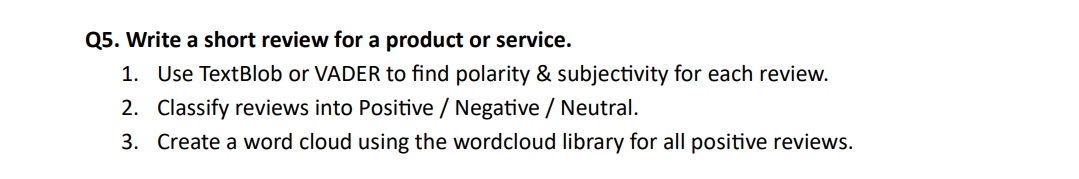


Review: This phone has an amazing battery life and a stunning display.
Polarity: 0.55, Subjectivity: 0.95, Sentiment: Positive

Review: The customer support was unhelpful and rude.
Polarity: -0.30, Subjectivity: 0.60, Sentiment: Negative

Review: Delivery was quick, but the packaging was average.
Polarity: 0.09, Subjectivity: 0.45, Sentiment: Neutral

Review: Absolutely love the camera quality and fast performance!
Polarity: 0.38, Subjectivity: 0.60, Sentiment: Positive

Review: I didn't like the interface; it's too complicated.
Polarity: -0.50, Subjectivity: 1.00, Sentiment: Negative


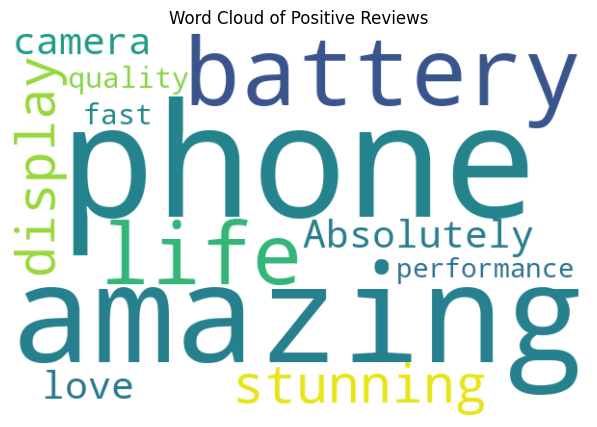

In [7]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Sample product/service reviews
reviews = [
    "This phone has an amazing battery life and a stunning display.",
    "The customer support was unhelpful and rude.",
    "Delivery was quick, but the packaging was average.",
    "Absolutely love the camera quality and fast performance!",
    "I didn't like the interface; it's too complicated."
]

# 2. Analyze polarity & subjectivity, and classify sentiment
results = []
positive_text = ""

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = (
        "Positive" if polarity > 0.1 else
        "Negative" if polarity < -0.1 else
        "Neutral"
    )
    results.append((review, polarity, subjectivity, sentiment))

    if sentiment == "Positive":
        positive_text += " " + review

# Display results
for r in results:
    print(f"\nReview: {r[0]}\nPolarity: {r[1]:.2f}, Subjectivity: {r[2]:.2f}, Sentiment: {r[3]}")

# 3. WordCloud for Positive Reviews
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()


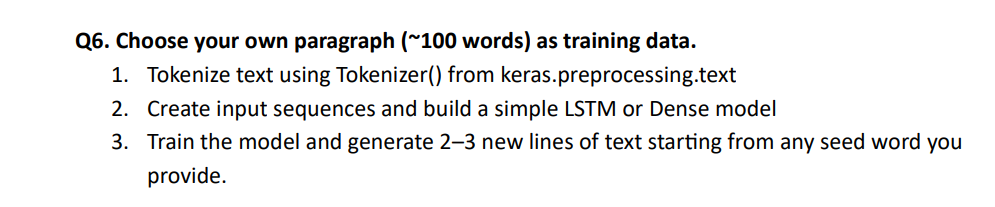

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 1. Training Paragraph (~100 words)
text = """
Books offer a portal to endless worlds. Whether fiction or nonfiction, each page opens a new adventure,
a new idea, or a reflection of reality. Some books teach, while others transport us to faraway lands.
Reading builds empathy, enhances vocabulary, and nurtures imagination. In a world dominated by screens,
books remain a quiet but powerful force. They speak in silence, leaving deep echoes in the reader's mind.
"""

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# 2. Create input sequences
input_sequences = []
token_list = tokenizer.texts_to_sequences([text])[0]

for i in range(2, len(token_list)):
    n_gram = token_list[:i+1]
    input_sequences.append(n_gram)

# Padding sequences
max_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_len, padding='pre'))

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# 3. LSTM Model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_len - 1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=0)

# 4. Generate new text
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_seq = tokenizer.texts_to_sequences([seed_text])[0]
        token_seq = pad_sequences([token_seq], maxlen=max_len - 1, padding='pre')
        predicted = model.predict(token_seq, verbose=0)
        next_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += ' ' + next_word
    return seed_text

# Try generating lines
print("\nGenerated Text:\n")
print(generate_text("books", 15))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Generated Text:

books portal portal portal portal portal worlds whether whether fiction fiction fiction or a a a
